# [Link do Github](https://github.com/StefanyFernandes675/REDES_NEURAIS)

In [16]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np

In [17]:
import sys
sys.setrecursionlimit(10000)  # Aumente o limite para um valor adequado

# Credit score

In [18]:
# Função sigmoide
def sigma(x):
    return 1 / (1 + np.exp(-x))

In [19]:
# Derivada da função sigmoid
def sigma_derivada(x):
    return sigma(x) * (1 - sigma(x))

In [20]:
# Cálculo das derivadas parciais
def grad(w1, w2, b1, b2, dataset):
    dedw1 = 0
    dedw2 = 0
    dedb1 = 0
    dedb2 = 0

    for i in train.index:
        x = train['Home Ownership'][i]
        y = train['Credit Score'][i]
        
        z1 = w1 * x + b1
        a1 = sigma(z1)
        z2 = w2 * a1 + b2
        a2 = sigma(z2)

        # Derivada do erro em relação a W1
        dedw1 += (a2 - y) * sigma_derivada(z2) * w2 * sigma_derivada(z1) * x

        # Derivada do erro em relação a W2
        dedw2 += (a2 - y) * sigma_derivada(z2) * a1

        # Derivada do erro em relação a B1
        dedb1 += (a2 - y) * sigma_derivada(z2) * w2 * sigma_derivada(z1)

        # Derivada do erro em relação a B2
        dedb2 += (a2 - y) * sigma_derivada(z2)

    return dedw1, dedw2, dedb1, dedb2

In [21]:
# gradiente desc
def descent(w1, w2, b1, b2, dataset):
    lr = 0.1
    err = 1
    i = 0
    tol = 10 **(-4)
    while err >= tol:
        dedw1, dedw2, dedb1, dedb2 = grad(w1, w2, b1, b2, dataset)
        
        w1_novo = w1 - lr * dedw1
        w2_novo = w2 - lr * dedw2
        b1_novo = b1 - lr * dedb1
        b2_novo = b2 - lr * dedb2
        
        errnovo = ((w1_novo - w1) ** 2 + (w2_novo - w2) ** 2 + (b1_novo - b1) ** 2 + (b2_novo - b2) ** 2) / 4
        print(f"Erro: {errnovo}, w1 = {w1_novo}, w2 = {w2_novo}, b1 = {b1_novo}, b2 = {b2_novo}")
        
        w1 = w1_novo
        w2 = w2_novo
        b1 = b1_novo
        b2 = b2_novo
        
        i += 1

        err = errnovo
        
    return w1, w2, b1, b2, i

## Dados
1 - High

0 - Low

In [22]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df_home_ownership = pd.read_csv("/content/drive/MyDrive/Redes_Neurais/df_home_ownership.csv")
df_home_ownership = df_home_ownership.drop("Unnamed: 0", axis=1)

In [24]:
df_home_ownership['Home Ownership'].value_counts()

1    109
0     19
Name: Home Ownership, dtype: int64

In [25]:
df_has_home_ownership = df_home_ownership[df_home_ownership['Home Ownership'] == 1]
df_has_home_ownership

,Home Ownership,Credit Score
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
...,...,...
122,1,1
123,1,1
125,1,1
126,1,1


Todos que tem casa própria tem um Credit Score alto.

## Definindo função score

In [26]:
def score(n):
  if n == 1:
    return 1
  else:
    return 0

## Separando o x e o y de treino e teste

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_home_ownership['Home Ownership'], df_home_ownership['Credit Score'], test_size=0.3)

## Dados de treino

In [28]:
train = pd.DataFrame([x_train, y_train])
train = train.T
train

,Home Ownership,Credit Score
61,1,1
74,1,1
87,1,1
38,0,0
32,1,1
...,...,...
103,0,1
71,1,1
42,1,1
8,1,1


## Dados de teste

In [29]:
test = pd.DataFrame([x_test, y_test])
test = test.T
test

,Home Ownership,Credit Score
30,1,1
102,0,1
76,1,1
85,1,1
101,1,1
10,0,0
47,1,1
33,0,0
59,1,1
23,1,1


## Calculando o w1, w2, b1, b2 dos dados de treino

In [30]:
w1, w2, b1, b2, i = descent(0, 0, 0, 0, train)
print("w1", w1)
print("w2",w2)
print("b2", b1)
print("b2",b2)
print("passos",i)

Erro: 0.26020507812500004, w1 = 0.0, w2 = 0.45625000000000004, b1 = 0.0, b2 = 0.9125000000000001
Erro: 0.019949079584271355, w1 = 0.0400580510715178, w2 = 0.580657571627245, b1 = 0.02838047727746525, b2 = 1.16131514325449
Erro: 0.00604685096206037, w1 = 0.07300198306914843, w2 = 0.6506430222719464, b1 = 0.047728177455959614, b2 = 1.2948434338473007
Erro: 0.002738131443184475, w1 = 0.10131565799541176, w2 = 0.6986036322565772, b1 = 0.061860808200749504, b2 = 1.3823129155140017
Erro: 0.0014934685481611787, w1 = 0.12651137103255516, w2 = 0.7345773879409665, b1 = 0.07265317609031727, b2 = 1.4449903750548185
Erro: 0.0009106853902995322, w1 = 0.14947410790589954, w2 = 0.7630402005543092, b1 = 0.08112302373954057, b2 = 1.49225118604469
Erro: 0.0005995086224517282, w1 = 0.17076174630915042, w2 = 0.7863843481028341, b1 = 0.0878826323068288, b2 = 1.5290510421350214
Erro: 0.0004180554390933324, w1 = 0.19074893332331624, w2 = 0.8060396844853351, b1 = 0.09332897709099576, b2 = 1.5583211496137581
Er

In [31]:
#xi = valor do input
#xs = lista com w1, w2, b1, b2
def predict(xi, xs):
    w1 = xs[0]
    w2 = xs[1]
    b1 = xs[2]
    b2 = xs[3]
    return sigma(w2 * sigma(w1 * xi + b1) + b2) # função sigma = 1/(1+math.exp(

In [32]:
# vetor gradiente do copo
# (2x, 2y)
def gradcopo(xs):
    return [2 * xs[0], 2 * xs[1]] # (2*w1, 2*w2)

In [33]:

def neural(ts, xs):
    w1 = xs[0]
    w2 = xs[1]
    b1 = xs[2]
    b2 = xs[3]
    
    def f(xi):
        return sigma(w2 * sigma(w1 * xi + b1) + b2)
    
    dedw1 = sum(
        [-(y - f(x)) * f(x) * (1 - f(x)) * w2 * sigma(w1 * x + b1) * (1 - sigma(w1 * x + b1)) * x
        for i in train.index
        for x, y in [(train['Home Ownership'][i], train['Credit Score'][i])]]
    )
    dedw2 = sum(
      [-(y - f(x) ) * f(x) * (1 - f(x)) * sigma(w1 * x + b1)
      for i in train.index
      for x, y in [(train['Home Ownership'][i], train['Credit Score'][i])]]
    )

    dedb1 = sum(
        [-(y - f(x)) * f(x) * (1 - f(x)) * w2 * sigma(w1 * x + b1) * (1 - sigma(w1 * x + b1))
         for i in train.index
         for x, y in [(train['Home Ownership'][i], train['Credit Score'][i])]]
    )
    dedb2 = sum(
        [-(y - f(x)) * f(x) * (1 - f(x))
         for i in train.index
         for x, y in [(train['Home Ownership'][i], train['Credit Score'][i])]]
    )
    
    return [dedw1, dedw2, dedb1, dedb2]

In [34]:
def descentV(grad, lr, i, err, xts):
    tol = 10 ** (-6)
    print(f"Valores iniciais de xts: {xts}")
    while err >= tol:
        dfdxs = grad(xts)
        xsnovo = [xt - lr * grad for (xt, grad) in zip(xts, dfdxs)]
        errnovo = sum([(xnovo - xt) ** 2 for (xnovo, xt) in zip(xsnovo, xts)])
        xts = xsnovo
        i += 1
        err = errnovo
        print(f"Erro: {errnovo}, dfdxs {dfdxs}, xts: {xsnovo}, i: {i}")
    return xts, i

In [35]:
p = descentV(lambda xs: print(xs) or neural(train, xs), 0.1, 0, 9999, [w1, w2, b1, b2])
fp = p[0]

Valores iniciais de xts: [0.30987931090289544, 0.8917130162563698, 0.1103993037506097, 1.6557930538712098]
[0.30987931090289544, 0.8917130162563698, 0.1103993037506097, 1.6557930538712098]
Erro: 0.0003320822348621121, dfdxs [-0.1525409925647106, -0.08316431320609402, -0.005800781476466594, -0.05467647589965133], xts: [0.3251334101593665, 0.9000294475769792, 0.11097938189825636, 1.6612607014611749], i: 1
[0.3251334101593665, 0.9000294475769792, 0.11097938189825636, 1.6612607014611749]
Erro: 0.00030320548059968404, dfdxs [-0.14986698293953563, -0.07789157601635999, -0.0027227680031679507, -0.04226019882416472], xts: [0.34012010845332, 0.9078186051786152, 0.11125165869857316, 1.6654867213435913], i: 2
[0.34012010845332, 0.9078186051786152, 0.11125165869857316, 1.6654867213435913]
Erro: 0.00028153923059842905, dfdxs [-0.1475469027918257, -0.07346172615240243, 5.5567786650825065e-05, -0.03141983830819161], xts: [0.3548747987325026, 0.9151647777938555, 0.11124610191990808, 1.6686287051744104

In [36]:
fp

[5.174308901371277, 6.741318548088736, -2.444375282203263, -1.882456967520301]

In [37]:
correct_predictions = 0
total_samples = len(test.index)

print("Descent")
print(p)
print("1 - Possui casa própria e 0 - Não possui casa própria")
for i in test.index:
  x = test['Home Ownership'][i]
  y = test['Credit Score'][i]
  print(f"Home ownership? {x}")
  prediction = predict(x, fp)
  print(f"Predict: {prediction}")
  print(f"Real: {y}\n")
  # Verificar se a previsão está correta
  if (prediction >= 0.5 and y == 1) or (prediction < 0.5 and y == 0):
      correct_predictions += 1
accuracy = correct_predictions / total_samples
print(f"Acurácia: {accuracy}")

Descent
([5.174308901371277, 6.741318548088736, -2.444375282203263, -1.882456967520301], 852)
1 - Possui casa própria e 0 - Não possui casa própria
Home ownership? 1
Predict: 0.9884115562395249
Real: 1

Home ownership? 0
Predict: 0.20682727852782246
Real: 1

Home ownership? 1
Predict: 0.9884115562395249
Real: 1

Home ownership? 1
Predict: 0.9884115562395249
Real: 1

Home ownership? 1
Predict: 0.9884115562395249
Real: 1

Home ownership? 0
Predict: 0.20682727852782246
Real: 0

Home ownership? 1
Predict: 0.9884115562395249
Real: 1

Home ownership? 0
Predict: 0.20682727852782246
Real: 0

Home ownership? 1
Predict: 0.9884115562395249
Real: 1

Home ownership? 1
Predict: 0.9884115562395249
Real: 1

Home ownership? 1
Predict: 0.9884115562395249
Real: 1

Home ownership? 0
Predict: 0.20682727852782246
Real: 0

Home ownership? 1
Predict: 0.9884115562395249
Real: 1

Home ownership? 1
Predict: 0.9884115562395249
Real: 1

Home ownership? 1
Predict: 0.9884115562395249
Real: 1

Home ownership? 1
Predi

# Gráfico da sigmoide

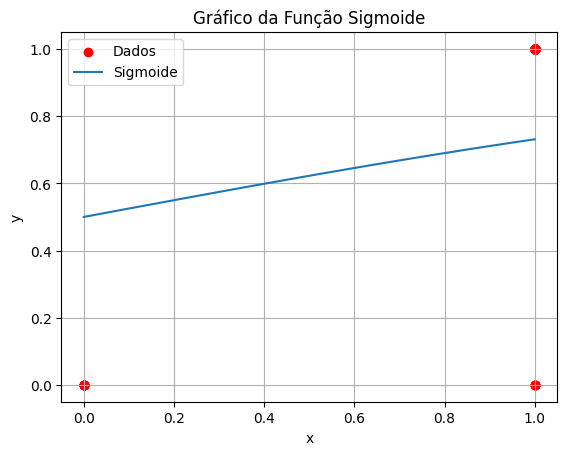

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Dados do conjunto de dados
x_data = df_home_ownership['Credit Score'] # Valores de x
y_data = df_home_ownership['Home Ownership']  # Valores de y

# Plotar os pontos do conjunto de dados
plt.scatter(x_data, y_data, color='red', label='Dados')

# Plotar a curva da função sigmoide
x = np.linspace(0, 1, 100)  # Valores de x para a função sigmoide
y = sigma(x)  # Valores de y calculados usando a função sigmoide

plt.plot(x, y, label='Sigmoide')

# Configurar rótulos e legenda
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico da Função Sigmoide')
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()